In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn import cross_validation
import numpy as np
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score
%matplotlib inline

digits.images.shape :  (1797, 8, 8) 


digits.images[0] : 
 [[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]] 


digits.data.shape :  (1797, 64) 


digits.data[0] : 
 [  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.] 


digits.target :  [0 1 2 ..., 8 9 8]


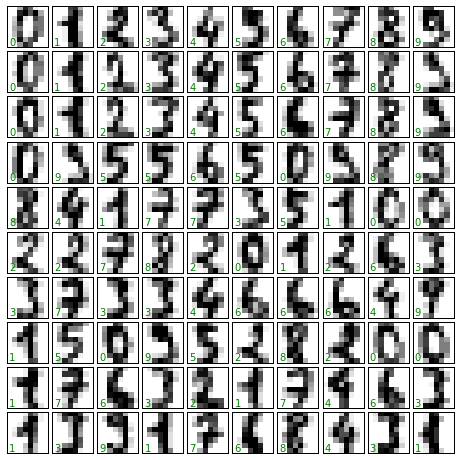

In [2]:
digits = datasets.load_digits()

fig,axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')
    ax.set_xticks([])
    ax.set_yticks([])
    

print("digits.images.shape : ",digits.images.shape,"\n\n")   # The images themselves
print("digits.images[0] : \n",digits.images[0],"\n\n")
print("digits.data.shape : ",digits.data.shape,"\n\n") # The data for use in our algorithms
print("digits.data[0] : \n",digits.data[0],"\n\n")
print("digits.target : ",digits.target)  # The target label

In [3]:
digits = load_digits()
X = digits.data
y = digits.target


knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

y_pred = knn.predict(X)

print("{0} / {1} correct".format(np.sum(y == y_pred), len(y)))

1797 / 1797 correct


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("{0} / {1} correct".format(np.sum(y_test == y_pred), len(y_test)),"\n")

print("y_pred : \n",y_pred,"\n\n")
print("X_train : \n",X_train,"\n\nX_test : \n",X_test,"\n\ny_train : \n",y_train,"\n\ny_test : \n",y_test,"\n")

print("X_train.shape, X_test.shape : ",X_train.shape, X_test.shape,"\n\n")
print("accuracy_score(y_test, y_pred) : ",accuracy_score(y_test, y_pred),"\n\n")
print("knn.score(X_test, y_test) : ",knn.score(X_test, y_test),"\n\n")

for n_neighbors in [1, 5, 10, 20, 30]:
    knn = KNeighborsClassifier(n_neighbors)
    knn.fit(X_train, y_train)
    print("n_neighbors : ",n_neighbors)
    print("knn.score(X_test, y_test)",knn.score(X_test, y_test),"\n")
    
print(knn.kneighbors_graph)

446 / 450 correct 

y_pred : 
 [1 1 8 5 8 4 3 0 8 3 2 0 9 7 0 9 1 3 2 0 0 2 4 1 6 2 4 1 0 4 6 8 9 2 9 0 3
 7 1 8 2 3 7 4 3 4 6 9 9 9 3 4 1 8 8 8 1 3 4 1 8 3 0 6 8 0 5 7 8 3 6 0 6 7
 2 1 1 9 4 8 4 9 5 1 7 1 4 4 8 4 5 5 4 1 8 4 5 7 9 8 5 6 7 0 3 9 0 0 7 2 1
 0 2 1 1 2 3 6 3 6 4 4 0 6 7 8 0 9 4 9 5 6 9 2 1 0 3 5 2 5 1 9 7 5 3 7 7 2
 4 4 3 8 8 9 3 8 5 9 3 9 7 6 3 3 3 8 1 0 1 5 1 8 0 1 9 9 8 8 9 0 3 3 0 5 6
 7 0 4 6 6 4 2 0 5 4 7 5 2 8 2 8 1 1 3 0 4 1 3 8 4 7 9 9 9 5 1 4 9 0 5 0 4
 5 1 4 2 5 9 4 1 6 7 4 5 9 6 5 5 1 5 8 7 1 7 5 7 9 3 0 7 5 1 5 8 2 2 9 6 6
 7 4 9 0 3 7 6 9 6 3 8 6 7 5 6 9 2 9 5 3 4 4 2 8 1 8 6 5 9 3 7 5 4 2 1 3 6
 0 2 6 7 9 6 0 6 0 0 2 4 4 8 7 6 6 8 3 1 3 8 2 9 9 8 7 6 6 7 2 4 6 6 0 7 8
 3 8 8 8 5 4 1 0 0 5 4 9 1 4 3 2 3 2 5 8 8 1 0 1 5 6 8 2 8 4 3 0 7 1 7 9 6
 1 1 2 3 5 2 7 9 7 1 1 1 8 0 4 3 2 7 4 0 2 5 6 1 6 0 5 6 8 2 5 6 2 1 1 7 7
 4 8 2 0 9 9 1 5 4 0 2 6 1 3 3 7 0 0 5 3 9 2 1 9 0 3 7 1 9 0 4 9 5 6 3 2 4
 2 2 8 3 3 6] 


X_train : 
 [[  0.   0.   5. ...,   0.   0.   0.]
 [

In [5]:
X1, X2, y1, y2 = train_test_split(X, y, test_size=0.5, random_state=0)
cv = cross_val_score(KNeighborsClassifier(1), X, y, cv=10)

print("X1.shape, X2.shape : ",X1.shape, X2.shape,"\n")
print("cv.mean() : ",cv.mean(),"\n")
print("KNeighborsClassifier(1).fit(X2, y2).score(X1, y1) : ",KNeighborsClassifier(1).fit(X2, y2).score(X1, y1),"\n")
print("KNeighborsClassifier(1).fit(X1, y1).score(X2, y2) : ",KNeighborsClassifier(1).fit(X1, y1).score(X2, y2),"\n")
print("cross_val_score(KNeighborsClassifier(1), X, y, cv=10) : ",cross_val_score(KNeighborsClassifier(1), X, y, cv=10))

X1.shape, X2.shape :  (898, 64) (899, 64) 

cv.mean() :  0.976149386025 

KNeighborsClassifier(1).fit(X2, y2).score(X1, y1) :  0.983296213808 

KNeighborsClassifier(1).fit(X1, y1).score(X2, y2) :  0.982202447164 

cross_val_score(KNeighborsClassifier(1), X, y, cv=10) :  [ 0.93513514  0.99453552  0.97237569  0.98888889  0.96089385  0.98882682
  0.99441341  0.98876404  0.97175141  0.96590909]


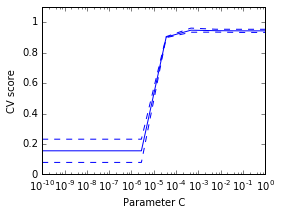

In [6]:
import numpy as np
from sklearn import cross_validation, datasets, svm

digits = datasets.load_digits()
X = digits.data
y = digits.target

svc = svm.SVC(kernel='linear')
C_s = np.logspace(-10, 0, 10)

scores = list()
scores_std = list()
for C in C_s:
    svc.C = C
    this_scores = cross_validation.cross_val_score(svc, X, y, n_jobs=1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

# Do the plotting
import matplotlib.pyplot as plt
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.semilogx(C_s, scores)
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), 'b--')
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('Parameter C')
plt.ylim(0, 1.1)
plt.show()

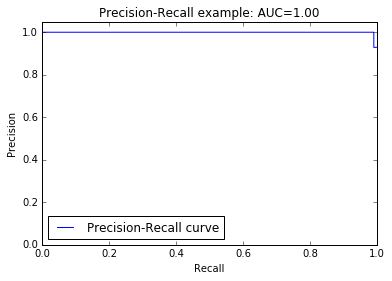


precision[i] : 
 [ 0.81395349  0.8125      0.81889764  0.82539683  0.832       0.83870968
  0.84552846  0.85245902  0.85950413  0.86666667  0.87394958  0.88135593
  0.88888889  0.89655172  0.89565217  0.90350877  0.91150442  0.91964286
  0.92792793  0.92727273  0.93577982  0.94444444  0.94392523  0.95283019
  0.96190476  0.97115385  0.98058252  0.99019608  0.99009901  0.99
  0.98989899  0.98979592  0.98969072  0.98958333  0.98947368  0.9893617
  0.98924731  0.98913043  0.98901099  0.98888889  0.98876404  0.98863636
  0.98850575  0.98837209  0.98823529  0.98809524  1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.

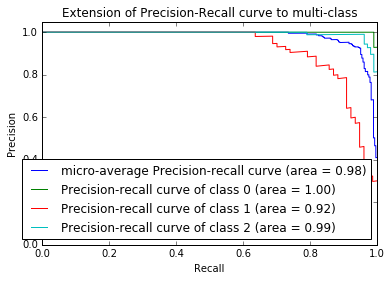

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm, datasets
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# import some data to play with
digits = datasets.load_digits()
X = digits.data
y = digits.target
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=random_state)
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(y_test, y_score,
                                                     average="micro")
plt.clf()
plt.plot(recall[0], precision[0], label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall example: AUC={0:0.2f}'.format(average_precision[0]))
plt.legend(loc="lower left")
plt.show()
plt.clf()
plt.plot(recall["micro"], precision["micro"],
         label='micro-average Precision-recall curve (area = {0:0.2f})'
               ''.format(average_precision["micro"]))
for i in range(n_classes):
    plt.plot(recall[i], precision[i],
             label='Precision-recall curve of class {0} (area = {1:0.2f})'
                   ''.format(i, average_precision[i]))

print("\nprecision[i] : \n",precision[i])
print("\n\nrecall[i] : ",recall[i])
print("\n\naverage_precision[i] : \n",average_precision[i])    
    
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(loc="lower right")
plt.show()